# No Show Appointments Analysis

## Questions

1. How many percent of patients missed their scheduled appointment?
2. What is the gender distribution for show/no-show patients?
3. What factors are important to know in order to predict if a patient will show up for their scheduled appointment?
4. What is the age distribution of diabetes who showed and did not show up?
5. Did the Scholarship of the patient's help in the attendance of their appointments?

## Data Gathering and Understanding

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [50]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.shape

(110527, 14)

In [51]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Problems:<br>
1) Column names are not in the convention rule<br>
2) PatientId type is float64<br>
3) ScheduledDay and AppointmentDay type is object

## Data Cleaning

**Step 1 - Removing Duplicate entries**

In [53]:
# Rremove duplicate entries
data_duplicates = data.duplicated()

In [54]:
data_duplicates.sum()

0

**Step 2 - Fix any missing or data format issues**

In [55]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Step 3 - make the names of columns convention names**

In [56]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [57]:
data.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
data.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

**Step 4 - Types Correction**

In [58]:
# convert type of patient_id column from float to int 
data['patient_id'] = data['patient_id'].astype('int64')

In [59]:
# convert type of scheduled_day and appointment_day columns from object to date
data['scheduled_day'] = pd.to_datetime(data['scheduled_day']).dt.date.astype('datetime64[ns]')
data['appointment_day'] = pd.to_datetime(data['appointment_day']).dt.date.astype('datetime64[ns]')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


**Step 4 - Remove unnecessary columns**

In [61]:
# Create new dataset without unwanted columns
clean_data = data.drop(['patient_id','scheduled_day','sms_received',
                                                'appointment_id','appointment_day'], axis=1)
clean_data.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No


**Step 6 - Add required columns**

In [62]:
# create awaiting_time_days column
clean_data['awaiting_time_days'] = (data.appointment_day - data.scheduled_day).dt.days

In [86]:
# create appointment_weekday column
clean_data['appointment_weekday'] = data.scheduled_day.dt.day_name()

In [87]:
clean_data.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,no_show,awaiting_time_days,appointment_weekday,no_show_numeric,category
0,F,62,JARDIM DA PENHA,0,1,0,0,0,No,0,Friday,0,Woman
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,0,Friday,0,Man
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,0,Friday,0,Woman
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,Friday,0,Child
4,F,56,JARDIM DA PENHA,0,1,1,0,0,No,0,Friday,0,Woman


In [94]:
clean_data['appointment_weekday'].value_counts()

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: appointment_weekday, dtype: int64

In [66]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
gender                 110527 non-null object
age                    110527 non-null int64
neighbourhood          110527 non-null object
scholarship            110527 non-null int64
hypertension           110527 non-null int64
diabetes               110527 non-null int64
alcoholism             110527 non-null int64
handicap               110527 non-null int64
no_show                110527 non-null object
awaiting_time_days     110527 non-null int64
appointment_weekday    110527 non-null object
dtypes: int64(7), object(4)
memory usage: 9.3+ MB


In [67]:
clean_data.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,awaiting_time_days
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,10.183702
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,15.254996
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,179.000000


## Data Visualization

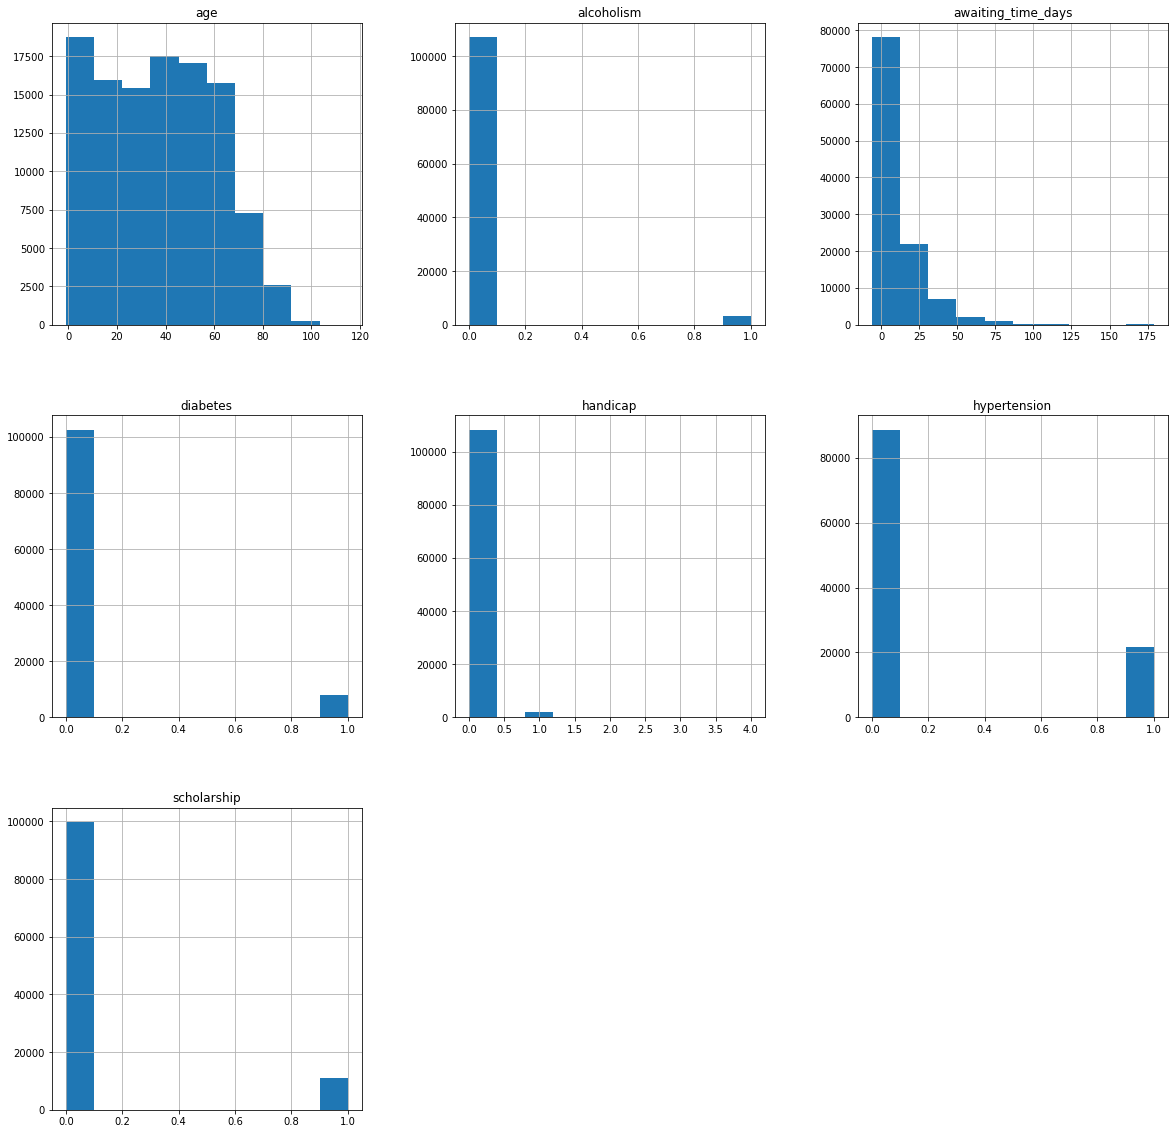

In [68]:
clean_data.hist(figsize=(20,20));

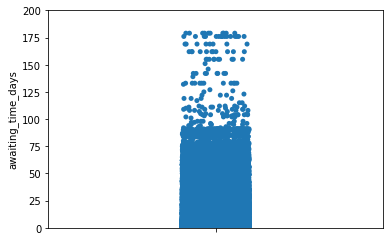

In [69]:
# It seems that most of the visits happened within 3 months from being scheduled
sns.stripplot(data = clean_data, y = 'awaiting_time_days', jitter = True)
plt.ylim(0, 200)
plt.show();

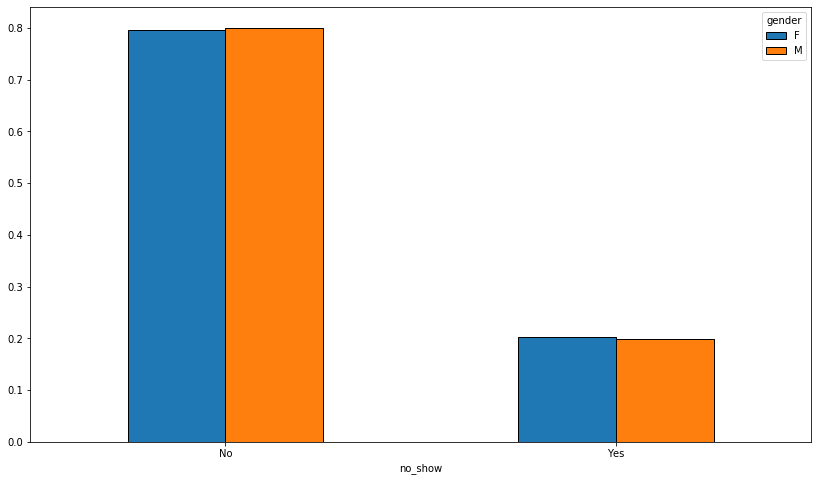

In [93]:
clean_data.groupby('gender')['no_show'].value_counts(normalize=True).unstack('gender').plot.bar(edgecolor='black',
                                                                                               figsize=[14,8],
                                                                                                rot=0,
                                                                                                width=0.5
                                                                                               )

## Answer the questions

### 1. How many percent of patients missed their scheduled appointment?

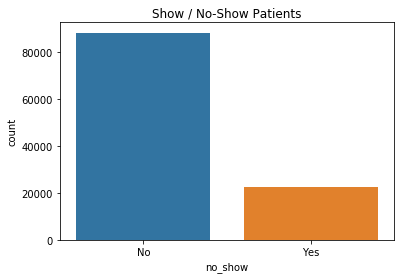

In [70]:
ax = sns.countplot(x=clean_data.no_show, data=clean_data)
ax.set_title("Show / No-Show Patients")
plt.show();

In [71]:
all_appointments = clean_data.shape[0]
missed_appointments = len(clean_data.query('no_show == \'Yes\''))
missed_ratio = int(round(missed_appointments/all_appointments*100))

print('{}% of appointments were missed.'.format(missed_ratio))

20% of appointments were missed.


### 2. What is the gender distribution for show / no-show patients?

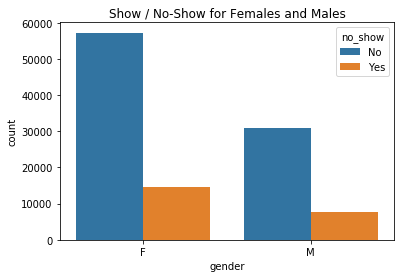

In [72]:
ax = sns.countplot(x=clean_data.gender, hue=clean_data.no_show, data=clean_data)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

In [73]:
all_appointments_by_f = len(clean_data.loc[clean_data['gender'] == "F"])
all_appointments_by_m = len(clean_data.loc[clean_data['gender'] == "M"])

missed_appointments_by_f = len(clean_data.query('no_show == "Yes" and gender == "F"'))
missed_appointments_by_m = len(clean_data.loc[(clean_data['gender'] == "M") & (clean_data['no_show'] == "Yes")])

missed_ratio_f = int(round(missed_appointments_by_f/all_appointments_by_f*100))
missed_ratio_m = int(round(missed_appointments_by_m/all_appointments_by_m*100))

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'
      .format(all_appointments_by_f, missed_appointments_by_f, missed_ratio_f))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'
      .format(all_appointments_by_m, missed_appointments_by_m, missed_ratio_m))

Out of 71840 appointments made by females, 14594 were missed with the ratio of 20%.
Out of 38687 appointments made by males, 7725 were missed with the ratio of 20%.


### 3. What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

In [90]:
def my_bar_plot(df,xVar,ax):
    
    plt.title(f'Distribution of show/no show\n {xVar}'.title(), fontsize = 14 , weight = "bold")
    plt.xlabel(xVar.title(), fontsize = 10 , weight = "bold")
    plt.ylabel('Frequancy'.title(), fontsize = 10 , weight = "bold")
    
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=False ,rot=0)

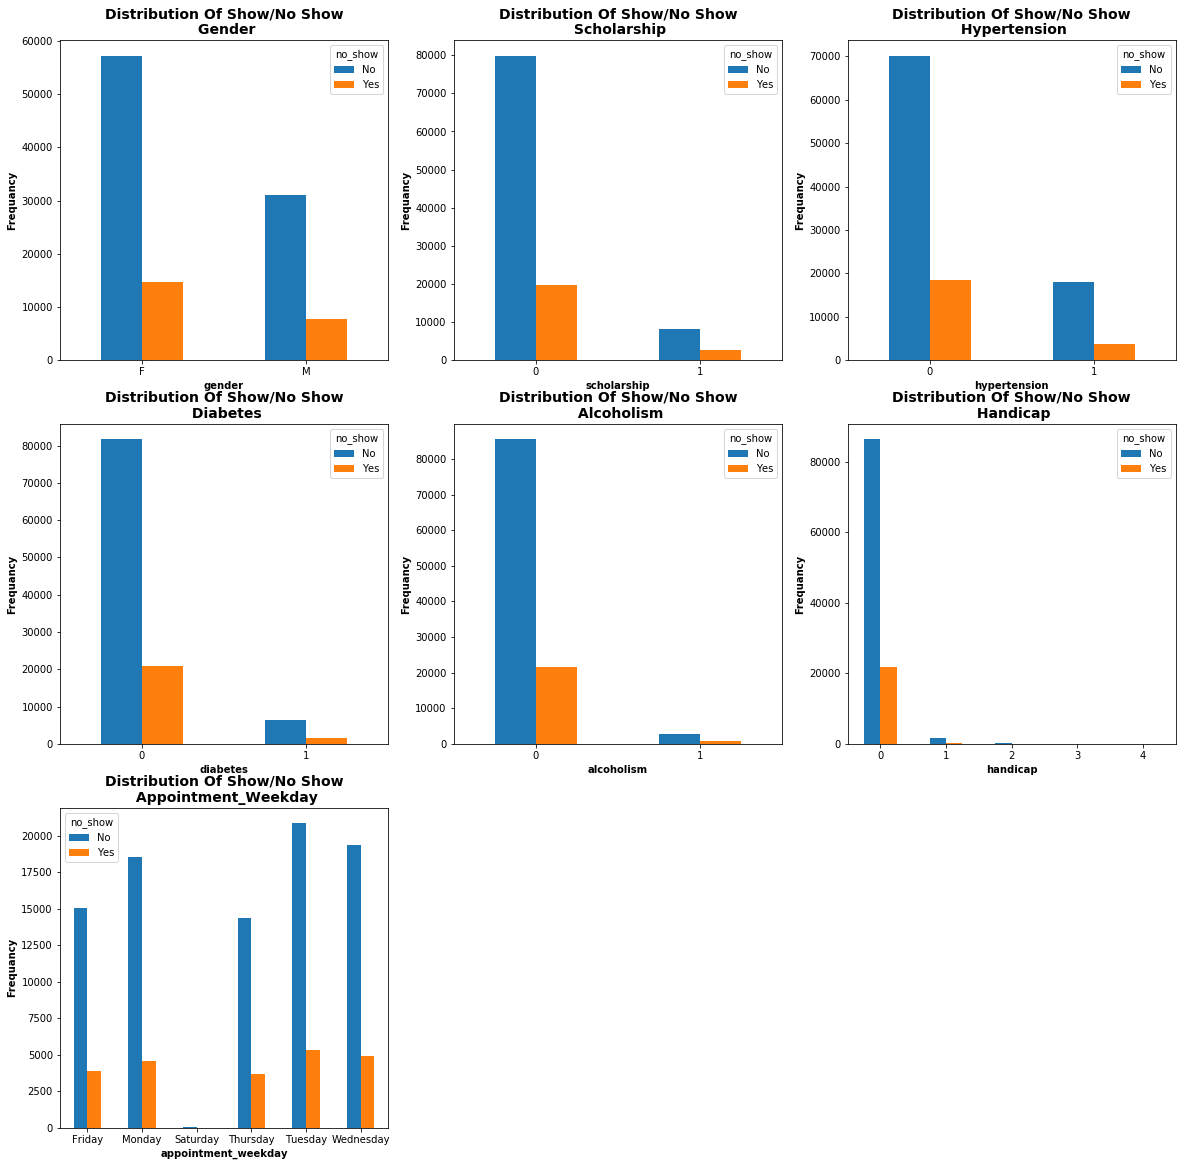

In [91]:
categorical_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 
                    'alcoholism', 'handicap', 'appointment_weekday']

fig = plt.figure(figsize=(20, 20))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    my_bar_plot(clean_data,var,ax)

The charts confirm about **20%** no-show rate for most categories.

In [76]:
# Two useful masks to be used in further analysis
showed = clean_data.no_show == 'No'
not_showed = clean_data.no_show == 'Yes'

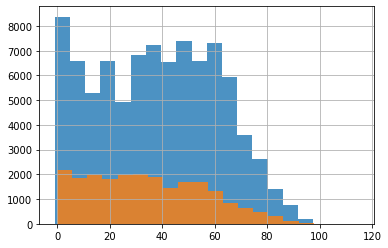

In [77]:
# Let's now look closer to numerical variables
# Age:
clean_data.age[showed].hist(alpha=0.8, bins=20);
clean_data.age[not_showed].hist(alpha=0.8, bins=20);

Infants show up most often than people around **50 - 55**, But between **1 - 65** years old, the rate of no-shows seems to be higher than **20%**.

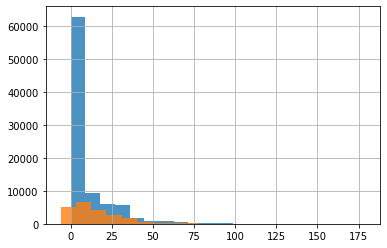

In [78]:
# Number of days between the date of scheduling an appointment and the appointment itself
clean_data.awaiting_time_days[showed].hist(alpha=0.8, bins=20);
clean_data.awaiting_time_days[not_showed].hist(alpha=0.8, bins=20);

**The shorter the waiting period the more patients show up.** Patients scheduling appointments for the same day are much more likely to show up (ca. **17%** of not showing up only).

### 4. What is age distribution of diabetes who showed and did not show up?

In [79]:
# This is a helper column representing no_shows in a numerical form (Yes->1, No->0)
clean_data['no_show_numeric'] = np.where(clean_data['no_show']=='Yes', 1, 0)

In [80]:
clean_data[['diabetes', 'no_show_numeric']].groupby(['diabetes'],
                                            as_index=False).mean().sort_values(by='no_show_numeric', ascending=False)

,diabetes,no_show_numeric
0,0,0.203628
1,1,0.180033


In general, **18%** of diabetes did not show up, which is about **2%** lower than the general average of not showing up.<br> 
It seems that diabetes is **more careful** about their health and takes medical appointments more seriously than nondiabetes.

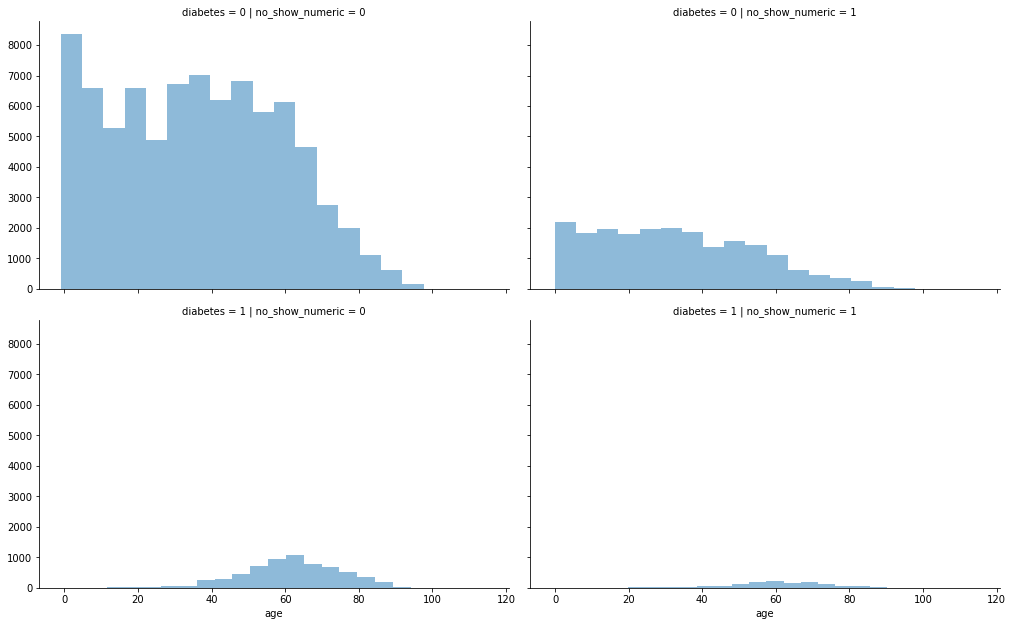

In [81]:
grid = sns.FacetGrid(clean_data, col='no_show_numeric', row='diabetes', height=4.4, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

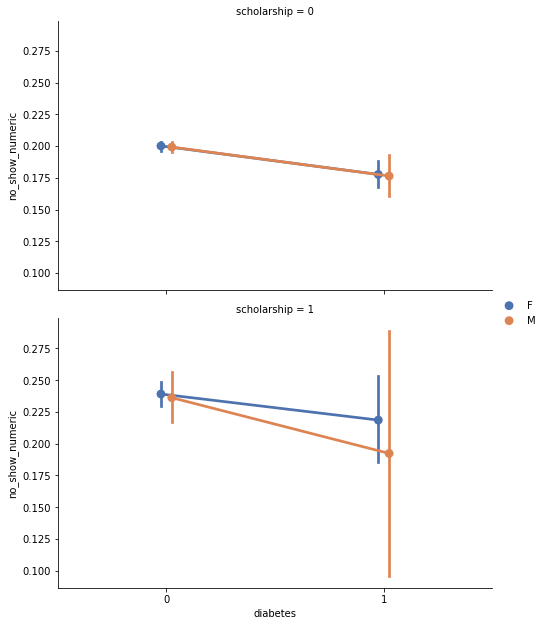

In [82]:
# Appointments related to patients with diabetes and participation in scholarship:
grid = sns.FacetGrid(clean_data, row='scholarship', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'diabetes', 'no_show_numeric', 'gender', palette='deep', dodge=True)
grid.add_legend();

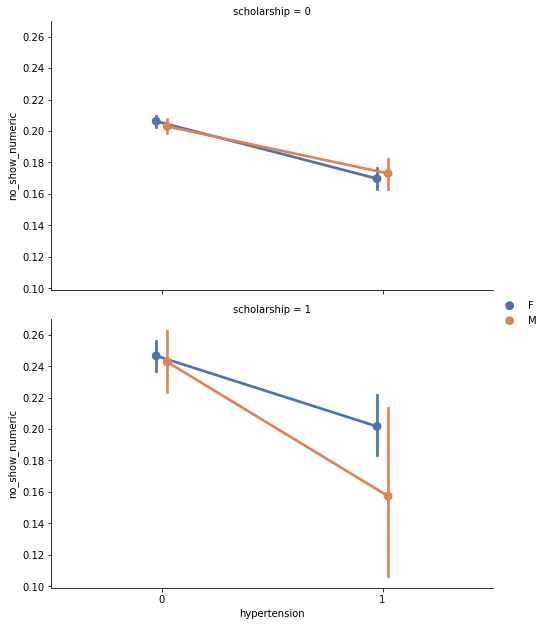

In [83]:
# Appointments related to patients with hypertension and participation in scholarship:
grid = sns.FacetGrid(clean_data, row='scholarship', height=4.4, aspect=1.6)
grid.map(sns.pointplot, 'hypertension', 'no_show_numeric', 'gender', palette='deep', dodge=True)
grid.add_legend();

### 5. Did the Scholarship of the patients helped in the attendence of their appointments?

In [84]:
# Create Category and Categorize people
clean_data.loc[((clean_data['gender'] == 'F') &
                (clean_data['age'] >= 18)),
               'category'] = 'Woman'

clean_data.loc[((clean_data['gender'] == 'M') &
                (clean_data['age'] >= 18)),
               'category'] = 'Man'

clean_data.loc[(clean_data['age'] < 18),
               'category'] = 'Child'

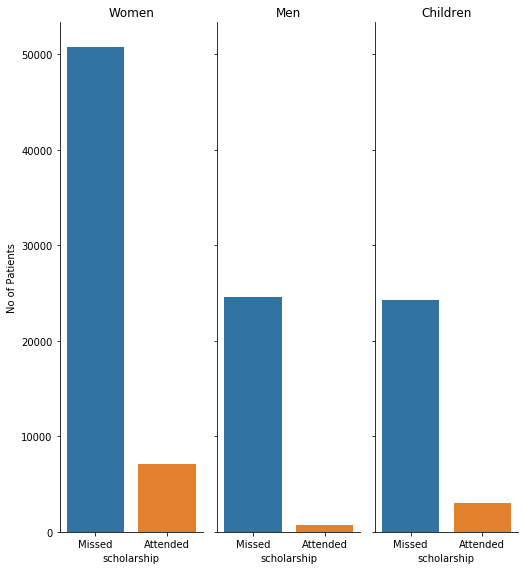

In [85]:
# Determine the number of Man, Woman and Children who had scholarship
man_with_scholarship = clean_data.loc[(clean_data['category'] == 'Man') &
                                      (clean_data['scholarship'] == 1)]

man_without_scholarship = clean_data.loc[(clean_data['category'] == 'Man') &
                                         (clean_data['scholarship'] == 0)]

woman_with_scholarship = clean_data.loc[(clean_data['category'] == 'Woman') &
                                        (clean_data['scholarship'] == 1)]

woman_without_scholarship = clean_data.loc[(clean_data['category'] == 'Woman') &
                                           (clean_data['scholarship'] == 0)]

children_with_scholarship = clean_data.loc[(clean_data['category'] == 'Child') &
                                           (clean_data['scholarship'] == 1)]

children_without_scholarship = clean_data.loc[(clean_data['category'] == 'Child') &
                                              (clean_data['scholarship'] == 0)]

# Graph - Compare how many man, woman and children with or without scholarship attended thier apoointments
g = sns.factorplot('scholarship', col='category', data=clean_data, kind='count', size=8, aspect=0.3)

# Fix up the labels
(g.set_axis_labels('scholarship', 'No of Patients')
    .set_xticklabels(['Missed', 'Attended']))

titles = ['Women', 'Men', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

According to the above bar graph:-
- The number of scholarship recipients did not affect the number of people visiting the hospital at their appointment.
- Women who received scholarships attended the most frequently followed appointments by children.
- The men visited the hospital at their shortest time.

The conclusion is that the grant discouraged the number of people attending their appointments regardless of age or gender.